# Datos de Marketing

Se propone un archivo CSV (`datos_marketing.csv`) de 2240 filas (clientes) con 28 columnas relacionadas con datos de marketing. 

Más específicamente, las columnas son:

* `id`: Identificador único del cliente (Considerada como la `primary-key`).

* `Year_Birth`: Año de nacimiento del cliente.

* `Education`: Nivel de educación del cliente.

* `Marital_Status`: Estado civil del cliente.

* `Income`: Ingreso familiar anual del cliente.

* `Kidhome`: Número de niños en el hogar del cliente.

* `Teenhome`: Número de adolescentes en el hogar del cliente.

* `Dt_Customer`: Fecha de alta del cliente en la plataforma de compras.

* `Recency`: Frescura del cliente, número de días desde la última compra del cliente,

* `MntWines`: Cantidad gastada en vino en los últimos 2 años.

* `MntFruits`: Cantidad gastada en fruta en los últimos 2 años. **(FALTABA INCLUIRLA EN LISTA)**

* `MntMeatProducts`: Cantidad gastada en carne en los últimos 2 años.

* `MntFishProducts`: Cantidad gastada en pescado en los últimos 2 años.

* `MntSweetProducts`: Cantidad gastada en dulces en los últimos 2 años.

* `MntSweetProducts`: Cantidad gastada en dulces en los últimos 2 años. **(REPETIDA)**

* `MntGoldProds`: Cantidad gastada en oro en los últimos 2 años.

* `NumDealsPurchases`: Número de compras con descuentos.

* `NumWebPurchases`: Número de compras realizadas a través de la web de la empresa.

* `NumCatalogPurchases`: Número de compras realizadas a través del catálogo de la empresa. **(CORREGIDO, EL NOMBRE ERA LA ANTERIOR VARIABLE)**

* `NumStorePurchases`: Número de compras realizadas en la tienda de la empresa.

* `NumWebVisitsMonth`: Número de visitas a la web de la empresa en el último mes.

* `AcceptedCmp1`: 1 si el cliente ha aceptado la oferta en la primera campaña que se le ha realizado. En caso contrario 0.

* `AcceptedCmp2`: 1 si el cliente ha aceptado la oferta en la segunda campaña que se le ha realizado. En caso contrario 0.

* `AcceptedCmp3`: 1 si el cliente ha aceptado la oferta en la tercera campaña que se le ha realizado. En caso contrario 0.

* `AcceptedCmp4`: 1 si el cliente ha aceptado la oferta en la cuarta campaña que se le ha realizado. En caso contrario 0.

* `AcceptedCmp5`: 1 si el cliente ha aceptado la oferta en la quinta campaña que se le ha realizado. En caso contrario 0.

* `Response`: 1 si el cliente ha aceptado la oferta en la última campaña que se le ha realizado. En caso contrario 0.

* `Complain`: 1 si el cliente ha realizado alguna queja en los últimos 2 años. En caso contrario 0.

* `Country`: Localización del cliente.

# Introducción

Vamos a ponernos en realizar un `roleplay` de analista de datos. El equipo de ventas y marketing nos ha pedido que las campañas de marketing recientes no han sido tan eficaces como se esperaba. Debemos analizar el conjunto de datos para comprender este problema y proponer soluciones basadas en datos.

## Tareas

* [x] ¿Hay valores nulos o valores atípicos? ¿Cómo los disputará/manejará? 

`Respuesta: Se ha restringido ligeramente el df para una visualización mejor`


* [x] ¿Hay alguna variable que justifique las transformaciones? 

`Respuesta: La variable "Income" debe ser un número entero, y "Dt_Customer" es preferible que se transforme a fecha`


* [x] ¿Hay alguna variable útil que pueda diseñar con los datos proporcionados?

`Respuesta: Con el gasto total del cliente y el número de compras se puede calcular el gasto promedio por cada compra`


* [x] ¿Notas algún patrón o anomalía en los datos? 

`Respuesta: Algunos indicios o pistas fueron encontrados, ver comentarios en los gráficos del final del ejercicio`


* [x] ¿Puede representarlo graficamente? (Aquí os ayudaremos)

`Respuesta: Se puede realizar un análisis gráfico exhaustivo. Se presentan algunas ideas que pueden derivar en posteriores gráficos con variables nuevas`

# Importación de librerías



In [1]:
import numpy as np # Para trabajar con matrices
import pandas as pd # Para trabajar con bases de datos
import matplotlib.pyplot as plt # Para dibujar gráficos sencillos
import seaborn as sns # Para producir gráficos más atractivos y avanzados
import plotly.express as px # Para generar gráficos interactivos

# Lea el dataset

## Solución

In [2]:
datos_originales = pd.DataFrame(pd.read_csv("datos_marketing.csv")) # Leemos el csv, lo convertimos en DataFrame y lo guardamos en una variable
display(datos_originales) # Mostramos el DataFrame 
df = datos_originales.copy() # Hacemos una copia de los datos originales

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


# Use el comando .info() para ver información del `dataset`.

## Solución

In [3]:
df.info() #Hay un total de 2240 entradas (datos clientes) repartidos en 28 columnas (variables) 
# pero no se puede ver la información de todas las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Para arreglarlo, se puede hacer clic en "View as a scrollable element" para mostrar todos los datos.

Tras comprobar los datos, se puede ver que solo hay datos nulos en la columna `Income`.

También se pueden ver los tipos de datos que contienen las variables, donde la mayoría son números enteros y alguna variable son object (strings). Sin embargo, Dt_Customer podría ser transformada en una variable fecha de ser necesario, pero la variable `Income` no debería estar guardada como un object sino como un int, así que es algo que hay que arreglar. También parece que hay algún problema en el nombre de la columna pues no está alineada con el resto.

# Use el comando .head() para ver las columas

¿Qué observa en la columna `'income'`?

## Solución

In [4]:
df.head() # A simple vista no se puede ver nada raro en los datos de Income. Sin embargo, si fuese un int, no podría tener el símbolo de la divisa ni 
# tampoco una coma para señalar los miles. Un detalle que es pasado por alto pues es muy intuitivo pensar que los datos están correctos al verlos así.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df["Income"] # Esto devolverá error, vamos a ver por qué

In [6]:
df.columns # El título de la columna "Income" tiene un espacio en blanco tanto al principio como al final

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
df[" Income "] # Ahora sí podemos ver los datos

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [8]:
df[" Income "].tolist() # Convertimos la columna en una lista, y así nos hemos asegurado de que los datos están en formato string

['$84,835.00 ',
 '$57,091.00 ',
 '$67,267.00 ',
 '$32,474.00 ',
 '$21,474.00 ',
 '$71,691.00 ',
 '$63,564.00 ',
 '$44,931.00 ',
 '$65,324.00 ',
 '$65,324.00 ',
 '$81,044.00 ',
 '$62,499.00 ',
 '$67,786.00 ',
 '$26,872.00 ',
 '$4,428.00 ',
 '$54,809.00 ',
 '$54,809.00 ',
 '$32,173.00 ',
 '$47,823.00 ',
 '$30,523.00 ',
 '$36,634.00 ',
 '$43,456.00 ',
 '$40,662.00 ',
 '$49,544.00 ',
 '$57,731.00 ',
 '$33,168.00 ',
 '$54,450.00 ',
 '$54,450.00 ',
 '$35,340.00 ',
 '$73,170.00 ',
 '$65,808.00 ',
 '$79,529.00 ',
 '$34,578.00 ',
 '$46,374.00 ',
 '$18,351.00 ',
 '$95,169.00 ',
 '$65,370.00 ',
 '$39,228.00 ',
 '$84,865.00 ',
 '$61,314.00 ',
 '$21,359.00 ',
 '$66,465.00 ',
 '$81,698.00 ',
 '$39,146.00 ',
 '$25,959.00 ',
 '$64,260.00 ',
 '$32,300.00 ',
 '$74,806.00 ',
 '$72,967.00 ',
 '$48,904.00 ',
 '$14,796.00 ',
 '$66,991.00 ',
 '$52,195.00 ',
 '$90,369.00 ',
 '$18,393.00 ',
 '$47,139.00 ',
 '$38,576.00 ',
 '$61,905.00 ',
 '$83,715.00 ',
 '$60,597.00 ',
 '$6,560.00 ',
 '$48,330.00 ',
 '$38,236.

# Tratamiento de la columna `'income'`

Trate la columna: 
* Eliminando el espacio del nombre de la columna. Puede usar la función `replace`.
* Quite el símbolo del dolar. Puede usar la función `replace`.
* Cambie la columna al tipo `float`. Puede usar la función `astype(...)`

## Solución

Quitamos el espacio en blanco de la columna `Income`

In [9]:
df.columns # df.columns antes de la transformación

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace(" ", "") # Queremos que el comando df.columns ahora incluya la siguiente transformación:
# Reemplaza los espacios en blanco en los strings de las columnas por nada, para eliminarlos simplemente.

In [11]:
df.columns # df.columns después de la transformación

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

Quitamos el símbolo de dólar de los datos.

In [12]:
df["Income"] # Datos antes de la transformación

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [5]:
df["Income"] = df["Income"].str.replace("$", "") # Mismo procedimiento que para cambiar el título de la columna, pero aplicado a los datos de la columna
df["Income"] 

0       84,835.00 
1       57,091.00 
2       67,267.00 
3       32,474.00 
4       21,474.00 
           ...    
2235    66,476.00 
2236    31,056.00 
2237    46,310.00 
2238    65,819.00 
2239    94,871.00 
Name: Income, Length: 2240, dtype: object

Cambiamos el tipo de dato de object a float

In [14]:
df["Income"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype 
--------------  ----- 
2216 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


In [ ]:
df["Income"] = df["Income"].astype("float") # Esto dará un error porque hay valores con espacios

In [6]:
df["Income"] = df["Income"].str.replace(" ", "") # Quitamos también los espacios

In [ ]:
df["Income"] = df["Income"].astype("float") # Esto también dará error porque hay valores con comas

In [7]:
df["Income"] = df["Income"].str.replace(",", "") # El valor de reemplazo también puede ser un guion bajo ("_") sin problemas

In [8]:
df["Income"] = df["Income"].astype("float")
df["Income"]

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

# Imprima de nuevo el dataset con `.head()` y compruebe los resultados

## Solución

In [19]:
df.head(10) # Hemos resuelto los problemas que tenía la columna "Income"

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


# Empecemos mirando los valores nulos de las columnas. 

Identifique el número de valores nulos en cada columna. 

Use el comando `isnull()` y la combinación de `isnull()` y `sum()` para lograrlo.

## Solución

In [20]:
df.info() # Revisamos que no todos los valores de Income son no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [21]:
df.isnull() # df.isnull() nos devuelve el df con True si el valor es nulo y False en caso contrario.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum() # con .sum() sumamos los True. Si añadiésemos otro .sum() sumaríamos todos los valores nulos de las columnas.

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

# ¿Qué columna tiene valores nulos?

¿Cuántos valores nulos ha conseguido detectar?

¿En qué columna/s?

A continuación use el siguiente código para representar la columna `'Income'` y trate de ver qué ocurre.



```python
plt.figure(figsize=(16, 8))
sns.histplot(datos['Income'])
plt.title('Distribucion de la columna "Income"', size=25)
plt.ylabel('Conteo');
```

Mire en el Eje X, ¿qué identifica en la figura? ¿Ve los valores nulos?



Según el comando anterior, vimos que en la columna `Income` hay un total de 24 valores nulos, los únicos en todos los datos

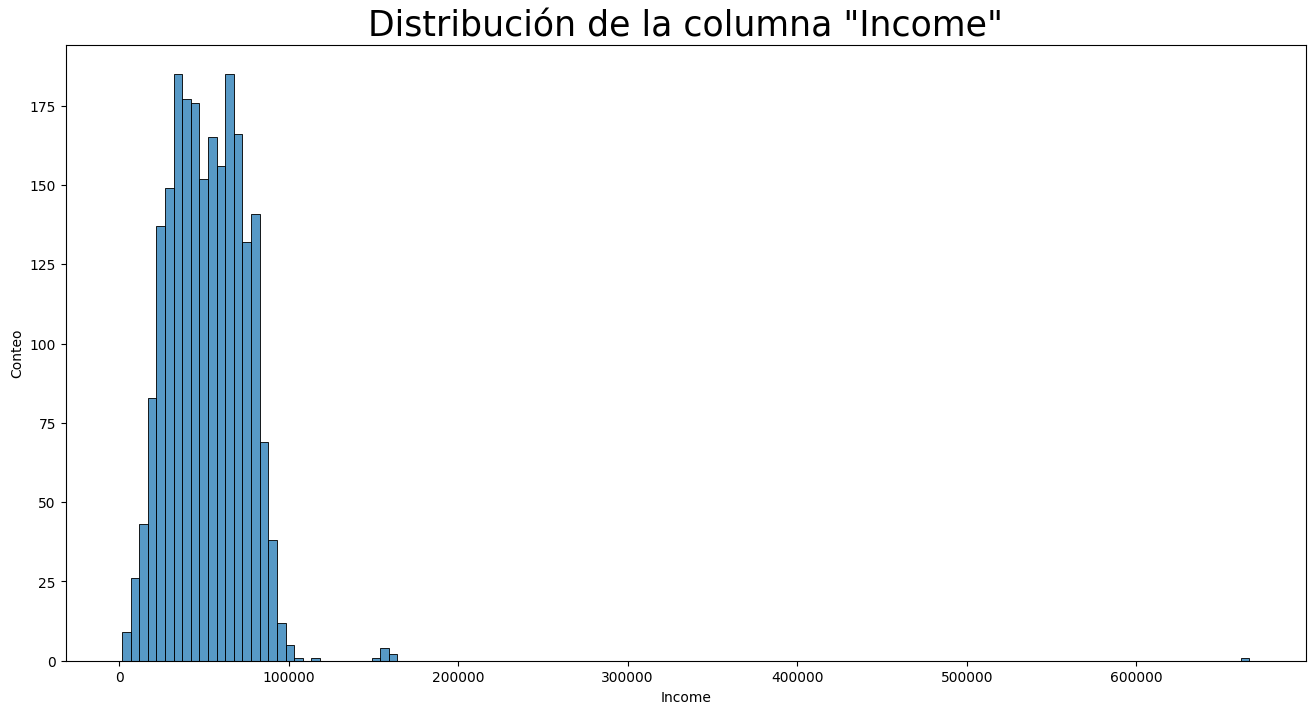

In [10]:
plt.figure(figsize=(16, 8))
sns.histplot(df['Income'])
plt.title('Distribución de la columna "Income"', size=25)
plt.ylabel('Conteo');

In [11]:
df["Income"].describe() # Ver rápidamente algunas estadísticas descriptivas de la columna "Income"

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

En la anterior figura se graficó un histograma con los datos de `Income`, en el que se agrupan los datos en pequeños intervalos y se suma la cantidad de datos que están contenidos dentro de esos intervalos (por ejemplo, cuántos clientes tenían un ingreso familiar anual de entre 10.000 y 14.999,99 dólares). El número de intervalos (bins) no está especificado así que se selecciona automáticamente.

En el eje horizontal, x, se representa el ingreso familiar anual de los clientes. Por cada 100.000 dólares hay, aproximadamente, entre 19 y 20 intervalos, por lo que dichos intervalos tienen una amplitud de aproximadamente 5.000 - 5.260 dólares. Cuantos más clientes encajan dentro de un intervalo de ingresos, más alta será la barra, que indica el recuento de clientes en el eje vertical, y, con ciertas marcas orientativas, de 25 en 25. 

Gracias a este gráfico podemos ver que la mayoría de datos de ingresos están por debajo de los 100.000 dólares. De hecho, el 75% de los datos están por debajo de los 68.522 dólares. Con el comando describe podemos ver adicionalmente que el ingreso medio es de 52.247,25 dólares y la mediana de 51.381,5 dólares. Media y mediana sugieren una ligera asimetría positiva, es decir, la distribución está inclinada hacia la izquierda, y hay valores elevados que "tiran" de la media hacia arriba.

Mediante este gráfico, no podemos ver los valores nulos, pues al no entrar en ninguna categoría numérica de ingresos, no se suman.

<Axes: >

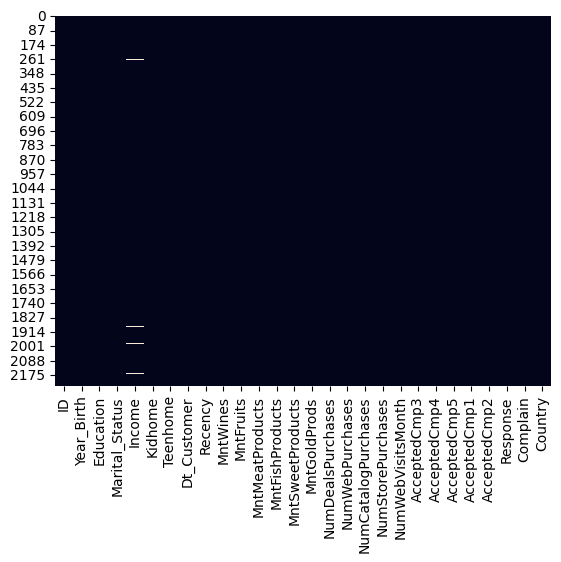

In [12]:
sns.heatmap(df.isnull(), cbar=False) # Otra forma de visualizar los valores nulos

Con este mapa de calor podemos ver dónde se sitúan los valores nulos en cada una de las columnas. La desventaja de este gráfico es que si hay gran cantidad de entradas, no todos los datos nulos pueden verse (vemos 4 marcas en vez de 24), por lo que este gráfico debería verse acompañado de un ```df.isnull().sum()``` para asegurarnos de que no pasamos por alto ningún valor

Aquí se puede ver que los valores superiores a 118350.5 dólares son considerados valores atípicos, y que en estos datos hay un total de 8.


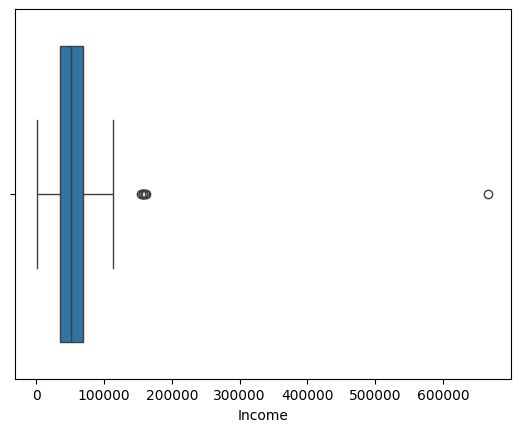

In [13]:
sns.boxplot(df["Income"], orient="h") # Otra forma de visualizar la distribución de la columna "Income"
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + IQR * 1.5
valores_atipicos = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))] # En este caso solo hay valores atípicos por encima del límite
# superior, así que podemos eliminar la primera condición del filtro.

print(f"Aquí se puede ver que los valores superiores a {limite_superior} dólares son considerados valores atípicos, y que en estos datos hay un total de {len(valores_atipicos)}.")

8 valores atípicos sobre un total de 2240 suponen un 0,35% de todos los datos. Por lo que una primera forma que tenemos de analizar los datos sin que haya influencias de los valores más extremos sería incluir un filtro para trabajar con los datos menores a 118.350,5 dólares.

In [14]:
df2 = df[df["Income"] <= limite_superior] # Creamos un dataframe con los valores típicos de la columna Income

<Axes: xlabel='Income'>

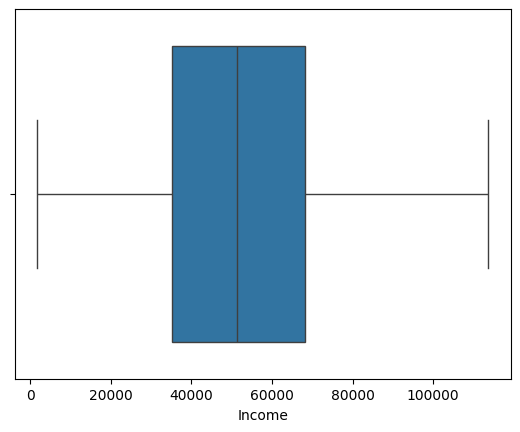

In [15]:
sns.boxplot(df2["Income"], orient="h") # Así es más cómodo visualizar los datos

<Axes: xlabel='Income', ylabel='Density'>

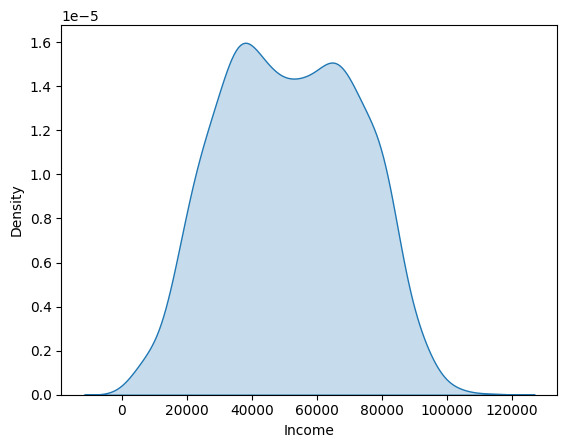

In [16]:
sns.kdeplot(df2["Income"], fill=True)

<Axes: xlabel='Income', ylabel='Count'>

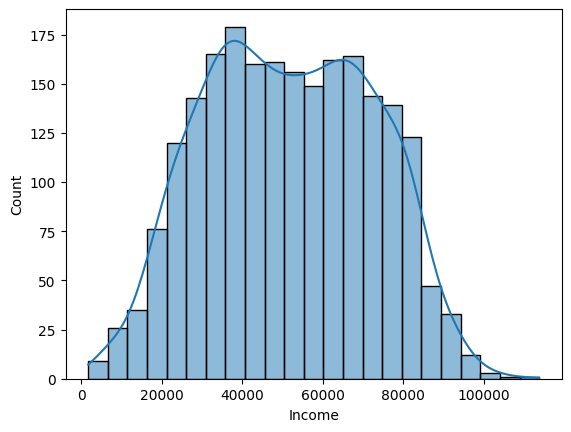

In [17]:
sns.histplot(df2["Income"], kde=True)

Text(0, 0.5, 'Año de nacimiento del cliente')

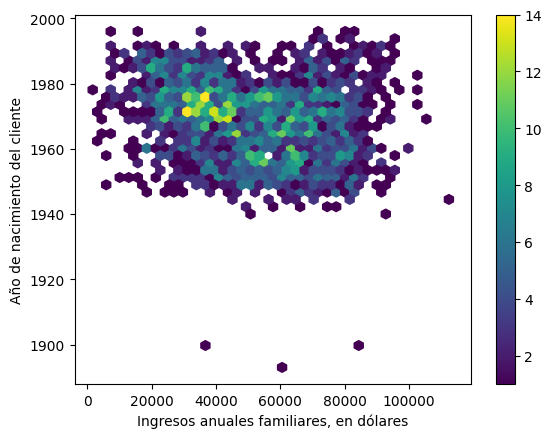

In [18]:
plt.hexbin(df2["Income"], df2["Year_Birth"], gridsize=40, cmap="viridis", mincnt=1)
plt.colorbar()
plt.xlabel("Ingresos anuales familiares, en dólares")
plt.ylabel("Año de nacimiento del cliente")

# Rellene los valores nulos

Use la **mediana** de la columna para rellenar aquellos valores nulos.

La mediana puede ser calculada mediante `'.median()'`

## Solución

In [19]:
df["Income"].fillna(df["Income"].median(), inplace=True) # Sustituimos los valores nulos por la mediana de los datos. Además, guardamos los cambios
# en el propio dataframe df sin necesidad de tener que asignarle estos cambios a una nueva variable.
df.isnull().sum() # Ningún datos es nulo ahora

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

<Axes: >

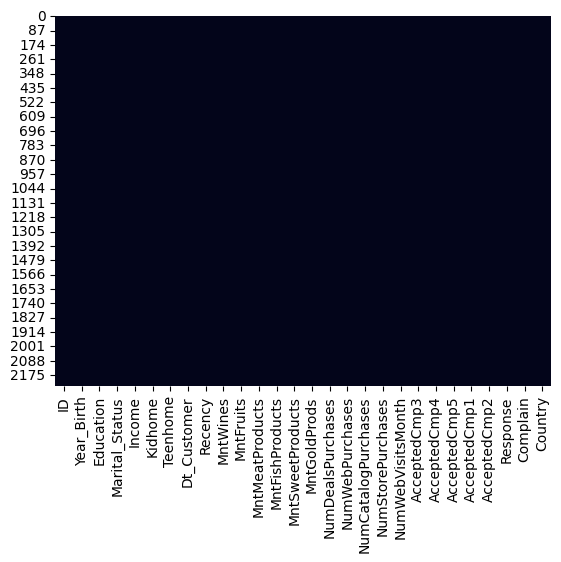

In [20]:
sns.heatmap(df.isnull(), cbar=False) # El gráfico está completamente vacío, no hay valores nulos

# ¿Requiere alguna columna de realizar una transformación?

Mire la columna `Dt_Customer`. Cambie el tipo de columna a `Datetime`.

Puede usar la función `to_datetime()`.

## Solución

In [21]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) # Convertimos la columna "Dt_Customer" a formato datetime
df.head()

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\1031882251.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) # Convertimos la columna "Dt_Customer" a formato datetime


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


# Otras tareas de ingeniería de datos que podemos hacer para facilitar la vida al equipo de ventas y marketing

Revise una lista de los nombres de columnas a continuación, a partir de los cuales podemos crear nuevas:

* Es posible crear una nueva columna con el número total de menores de edad en el hogar (nueva columna `'Dependents'`) a partir de la suma de `'Kidhome'` y `'Teenhome'`.

* Es posible tener a mano el año de cuando el cliente compró por primera vez (nueva columna `'Year_Customer'`)  partir de `'Dt_Customer'`.

* La cantidad total gastada (nueva columna `"TotalMnt"`) se puede crear a partir de la suma de todas las columnas que contienen la palabra clave `'Mnt'`.

* Las compras totales (nueva columna `"TotalPurchases"`) se pueden diseñar a partir de la suma de todas las columnas que contienen la palabra clave `'Purchases'`.

* El número total de campañas aceptadas por clientes (nueva columna `'TotalCampaignsAcc'`) se puede diseñar a partir de la suma de todas las columnas que contienen las palabras clave `'Cmp'` y `'Response'` (significa que es la última campaña).


## Solución

In [22]:
df2 = df[df["Income"] <= limite_superior] # Repetimos esto para que el df2 incluya los cambios más recientemente aplicados al df

In [79]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [23]:
df2.info() # Vemos que df2 no tiene ningún valor nulo, pues los nulos de Income fueron sustituidos por la mediana, y que las variables 
# tienen el tipo de dato correcto (Income y Dt_Customer). Además, vemos que ahora hay 2232 datos en vez de 2240 porque ya no hay valores atípicos.

# De todas formas, si se quisiera trabajar con el df completo, incluyendo esos datos atípicos, simplemente hay que cambiar df2 por df en los comandos.

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Education            2232 non-null   object        
 3   Marital_Status       2232 non-null   object        
 4   Income               2232 non-null   float64       
 5   Kidhome              2232 non-null   int64         
 6   Teenhome             2232 non-null   int64         
 7   Dt_Customer          2232 non-null   datetime64[ns]
 8   Recency              2232 non-null   int64         
 9   MntWines             2232 non-null   int64         
 10  MntFruits            2232 non-null   int64         
 11  MntMeatProducts      2232 non-null   int64         
 12  MntFishProducts      2232 non-null   int64         
 13  MntSweetProducts     2232 non-null   i

Crear una nueva columna con el número total de menores de edad en el hogar (nueva columna `'Dependents'`) a partir de la suma de `'Kidhome'` y `'Teenhome'`.

In [24]:
df2["Dependents"] = df2["Kidhome"] + df2["Teenhome"] # Número de menores de edad en el hogar
df2.head()

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\383572702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Dependents"] = df2["Kidhome"] + df2["Teenhome"] # Número de menores de edad en el hogar


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,1


Es posible tener a mano el año de cuando el cliente compró por primera vez (nueva columna `'Year_Customer'`)  partir de `'Dt_Customer'`.

In [25]:
df2["Year_Customer"] = df2["Dt_Customer"].dt.year # Año de la fecha de alta del cliente
df2.head()

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\2235585467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year_Customer"] = df2["Dt_Customer"].dt.year # Año de la fecha de alta del cliente


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,0,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,0,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,1,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,2,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,1,2014


La cantidad total gastada (nueva columna `"TotalMnt"`) se puede crear a partir de la suma de todas las columnas que contienen la palabra clave `'Mnt'`.

In [26]:
df2["TotalMnt"] = df2[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1) 
df2.head()

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\1352586350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TotalMnt"] = df2[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,2014,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,2014,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,2014,91


Las compras totales (nueva columna `"TotalPurchases"`) se pueden diseñar a partir de la suma de todas las columnas que contienen la palabra clave `'Purchases'`.

In [27]:
df2["TotalPurchases"] = df2[["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum(axis=1) 
df2.head()

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\2629107278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TotalPurchases"] = df2[["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum(axis=1)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,2014,91,8


El número total de campañas aceptadas por clientes (nueva columna `'TotalCampaignsAcc'`) se puede diseñar a partir de la suma de todas las columnas que contienen las palabras clave `'Cmp'` y `'Response'` (significa que es la última campaña).

In [132]:
df2["TotalCampaignsAcc"] = df2[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum(axis=1) 
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,AverageMnt
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,1190,15,1,79.333333
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,577,18,2,32.055556
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,251,11,0,22.818182
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,11,4,0,2.750000
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,91,8,2,11.375000


Con los datos de la cantidad total gastada y el número total de compras podemos calcular el gasto medio de cada cliente en compras.

In [29]:
df2["AverageMnt"] = df2["TotalMnt"] / df2["TotalPurchases"]
df2["AverageMnt"].describe() #Esta variable puede ser problemática pues algunos valores son infinitos

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\1762460238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["AverageMnt"] = df2["TotalMnt"] / df2["TotalPurchases"]
C:\Users\juanv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2232.000000
mean             inf
std              NaN
min         0.533333
25%         9.714286
50%        23.363971
75%        45.414583
max              inf
Name: AverageMnt, dtype: float64

In [30]:
df2["AverageMnt"].sort_values(ascending=False) # Vemos que hay 2 valores infinitos, las observaciones 456 y 1291

456             inf
1291            inf
1213    1679.000000
60       186.500000
1656     173.230769
           ...     
233        2.250000
32         2.000000
1472       2.000000
663        0.600000
1466       0.533333
Name: AverageMnt, Length: 2232, dtype: float64

In [31]:
df2 = df2.replace([np.inf, -np.inf], np.nan) # Reemplazamos los valores infinitos por nulos
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Education            2232 non-null   object        
 3   Marital_Status       2232 non-null   object        
 4   Income               2232 non-null   float64       
 5   Kidhome              2232 non-null   int64         
 6   Teenhome             2232 non-null   int64         
 7   Dt_Customer          2232 non-null   datetime64[ns]
 8   Recency              2232 non-null   int64         
 9   MntWines             2232 non-null   int64         
 10  MntFruits            2232 non-null   int64         
 11  MntMeatProducts      2232 non-null   int64         
 12  MntFishProducts      2232 non-null   int64         
 13  MntSweetProducts     2232 non-null   i

In [32]:
pd.set_option('display.max_columns', None) # Para poder ver todas las columnas

In [33]:
df2[455:456] # Vemos el dato nulo al final

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,AverageMnt
456,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,0,SA,0,2014,6,0,0,NaN


In [34]:
df2[455:456].replace(np.nan, 6, inplace=True) # Reemplazamos los valores nulos por el valor en TotalMnt

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\3009798412.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[455:456].replace(np.nan, 6, inplace=True) # Reemplazamos los valores nulos por el valor en TotalMnt
C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\3009798412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[455:456].re

In [35]:
df2[455:456] # Ya no hay nulo

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,AverageMnt
456,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,0,SA,0,2014,6,0,0,6.0


In [36]:
df2[1286:1287] # Vemos el dato nulo al final

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,AverageMnt
1291,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,IND,1,2013,5,0,0,NaN


In [37]:
df2[1286:1287].replace(np.nan, 5, inplace=True) # Reemplazamos los valores nulos por el valor en TotalMnt

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\665512770.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[1286:1287].replace(np.nan, 5, inplace=True) # Reemplazamos los valores nulos por el valor en TotalMnt
C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\665512770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[1286:1287].

In [38]:
df2[1286:1287] # Ya no hay nulo

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,AverageMnt
1291,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,IND,1,2013,5,0,0,5.0


In [39]:
df2["AverageMnt"].sort_values(ascending=False)

1213    1679.000000
60       186.500000
1656     173.230769
35       158.416667
1293     148.733333
           ...     
233        2.250000
32         2.000000
1472       2.000000
663        0.600000
1466       0.533333
Name: AverageMnt, Length: 2232, dtype: float64

Con estos datos adicionales podría seguir analizándose el dataframe para intentar averiguar patrones de comportamiento de los clientes en base a determinadas características de los mismos. Para ello puede emplearse el análisis gráfico.

## ¿Influye el número de hijos en el gasto Total de los clientes?

Vamos a comprobarlo visualizando varios gráficos para asegurarnos y explicándolos para que se comprendan bien.

In [43]:
figura1 = px.scatter(df2, x="TotalMnt", y="Dependents", template = "plotly_dark", size = "TotalMnt", color = "Dependents", title = "Relación entre el gasto total y el número de menores del hogar", labels = {"TotalMnt": "Gasto total", "Dependents": "Menores en el hogar"})
figura1.update_xaxes(title_text = "Gasto total del cliente en dólares")
figura1.update_yaxes(title_text = "Menores de edad en el hogar")
figura1.update_layout(title = "Gasto por menores", title_font=dict(size=25, family="Calibri", color="white"))

Curiosamente, parece que hay una relación inversa entre el número de menores y el gasto total del cliente, aunque a mayor número de menores, menor cantidad de datos hay, por lo que podría no ser representativo. También cabe la posibilidad de que este no sea el gráfico más adecuado para intentar averiguar esta relación.

In [45]:
figura1_2 = px.histogram(df2, x = "TotalMnt", color = "Dependents", template = "plotly_dark", title = "Histograma del gasto total por menores en el hogar", labels = {"TotalMnt": "Gasto total", "Dependents": "Menores en el hogar"})
figura1_2.show()

En este histograma se representa la cantidad total de clientes (eje vertical) según el gasto total (tramos de 100 dólares del eje horizontal) y según el número de menores en el hogar (código de colores). Se puede ver que los tramos de color más grandes son los de 0 y 1 menores y que casi 1/3 de los clientes gastan entre 0 y 99 dólares.

In [46]:
figura1_3 = px.density_heatmap(df2, x="TotalMnt", y="Dependents", marginal_x="histogram", marginal_y="histogram")
figura1_3.show()

En este mapa de calor se puede ver la densidad de los datos en relación con el gasto total de los clientes (eje horizontal) y su número de menores (eje vertical), acompañados de un histograma para mbas variables. Se puede ver que la mayoría de los datos están agrupados en el intervalo de 0 a 199 dólares de gasto, y que la mayoría de la gente tiene 1 menor en casa o menos. De nuevo, parece intuirse que a mayor número de menores en casa menor gasto total (arriba a la izquierda del gráfico) y que a menor número de menores en casa mayor es el gasto total (abajo a la derecha), gracias a un pequeño camino de celdas violetas que parece que tiene una trayectoria descendente desde los focos de mayor densidad.

In [47]:
figura1_4 = px.violin(df2, y="TotalMnt", x="Dependents", box=True, points="all", hover_data=df2.columns, template="plotly_dark")
figura1_4.show()

Con un gráfico de violín con un boxplot integrado podemos ver con mayor claridad cómo se distribuyen los datos del gasto total según los menores en el hogar. Puede apreciarse cómo a mayor número de menores, menor concentración de puntos en los tramos de altos niveles de gasto. La anchura del violín representa la concentración de los puntos: a mayor concentración, mayor anchura. Además, el boxplot integrado nos indica los cuartiles 1 y 3 y el gasto mediano, con una tendencia decreciente a mayor número de menores.

In [48]:
figura1_5 = px.density_contour(df2, x="TotalMnt", y="Dependents",  template="plotly_dark" )
figura1_5.update_traces(contours_coloring="fill", contours_showlabels = True)
figura1_5.show()

Con este gráfico de contorno, se puede apreciar cómo la mayoría de datos se agrupan en un gasto aproximado de 100 dólares y 1 menor. Partiendo del mismo gasto, a mayor número de menores (subir verticalmente desde el punto amarillo), menor concentración de clientes. Partiendo del mismo número de menores, a mayor gasto (desplazarse horizontalmente a la derecha desde el punto amarillo), menor concentración de clientes. De hecho, la cantidad de clientes con 1 menor en casa baja de 50 a partir de un nivel de gasto total inferior al que los clientes sin menores pueden alcanzar. Dicho de otra forma, es más numeroso el grupo de clientes con 1 menor y poco gasto que el de 0 menores y poco gasto (y el de 2 menores con poco gasto), pero la región violeta del centro del gráfico parece sugerir que es más numeroso el grupo de clientes con 0 menores y mucho gasto que el de 1 menor y mucho gasto.  

En suma, parece que sí hay una relación negativa entre el número de hijos y la cantidad gastada

## ¿Cuál es el gasto promedio de los clientes según su año de afiliación?

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\1076286865.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Year_Customer', ylabel='AverageMnt'>

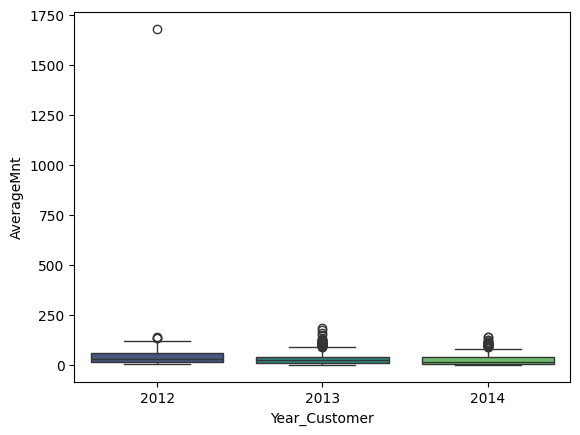

In [49]:
figura2 = sns.boxplot(data=df2, x="Year_Customer", y="AverageMnt", palette="viridis")
figura2 # Se ve que hay un valor atípico enorme debido a que un cliente (de ID 8720) ha gastado mucho en una sola compra. 

# Hay 2 posibles soluciones:
# 1) Podemos intentar eliminar ese valor atípico creando un df3 cuyo filtro sea df2["AverageMnt"] < 500
# 2) Podemos trabajar con el Gasto total en vez de con el promedio

In [50]:
df2[1208:1209]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,AverageMnt
1213,8720,1978,2n Cycle,Together,51381.5,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,0,IND,0,2012,1679,1,1,1679.0


### Excluyendo el dato atípico

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\3338548061.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Year_Customer', ylabel='AverageMnt'>

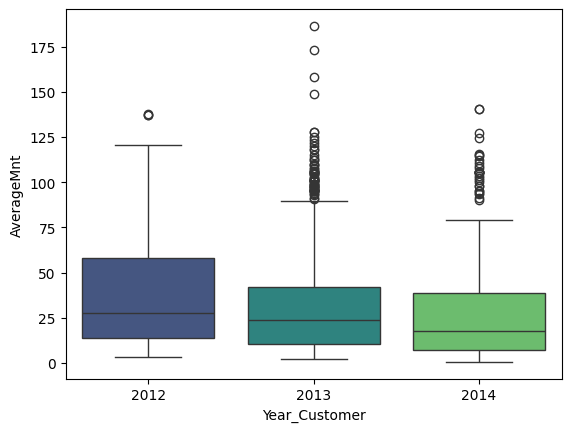

In [51]:
df3 = df2[df2["AverageMnt"] < 500] 
figura2_1 = sns.boxplot(data=df3, x="Year_Customer", y="AverageMnt", palette="viridis")
figura2_1

### Trabajando con datos totales

In [52]:
figura2_2 = px.box(df2, x="Year_Customer", y="TotalMnt", template="plotly_dark", title="Gasto total por año de alta del cliente", labels={"Year_Customer": "Año de alta", "TotalMnt": "Gasto total"})
figura2_2

C:\Users\juanv\AppData\Local\Temp\ipykernel_24360\891895883.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Year_Customer', ylabel='TotalMnt'>

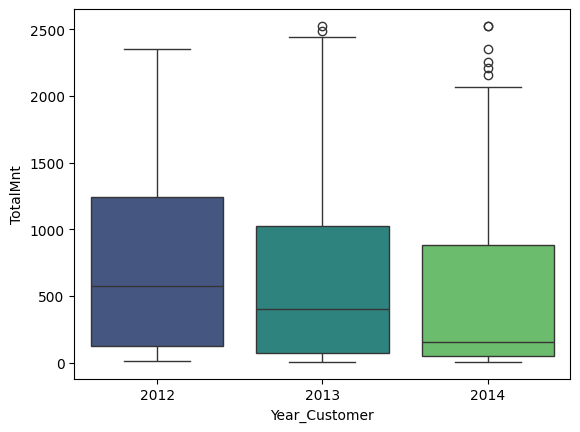

In [53]:
figura2_3 = sns.boxplot(data=df2, x="Year_Customer", y="TotalMnt", palette="viridis")
figura2_3

## ¿Cómo varía el gasto promedio con el Ingreso total?

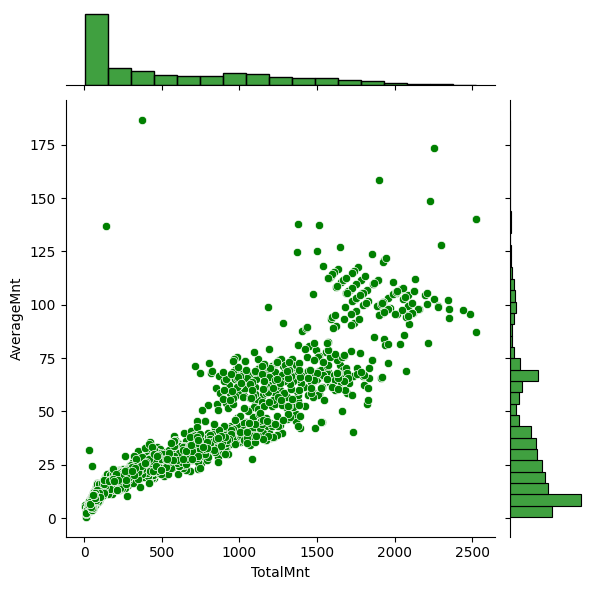

In [120]:
figura3 = sns.jointplot(x='TotalMnt',y='AverageMnt',data=df3,kind= "scatter", color="green") 
# Usamos df3 y no df2 para que no aparezca el dato extremo del promedio.
figura3

La relación, que intuitivamente se presupone que es positiva, se confirma con estos datos. Esto nos brinda información importante acerca de cómo perciben los clientes a este negocio. A mayor renta personal, mayor gasto promedio en compras, lo que sugiere que los productos del negocio, en promedio son próximos a un bien normal (en el caso de un bien inferior, a mayor renta, menor cantidad demandada y viceversa).

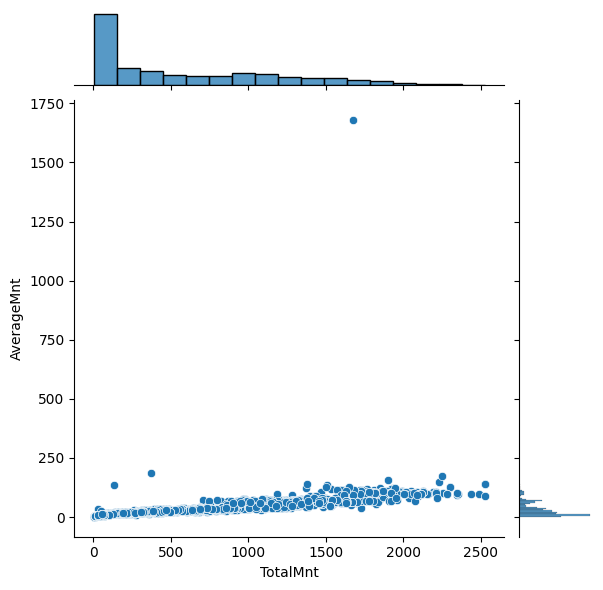

In [59]:
figura3_mal = sns.jointplot(x='TotalMnt',y='AverageMnt',data=df2,kind='scatter') # Demostración de la perturbación en los datos
figura3_mal

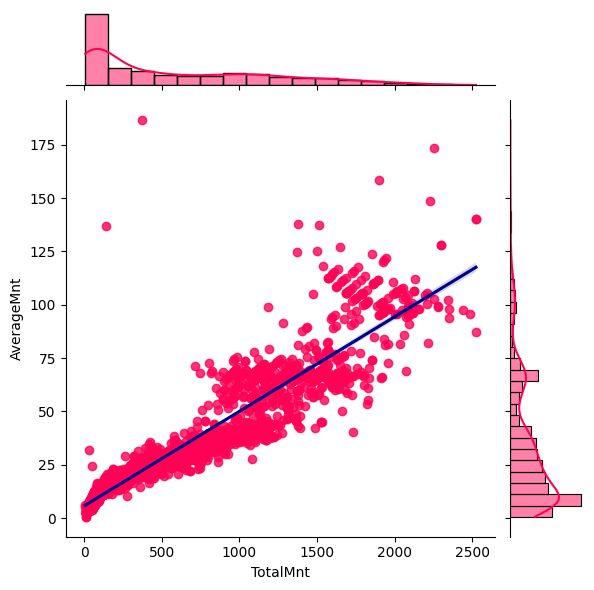

In [232]:
figura3_1 = sns.jointplot(x='TotalMnt',y='AverageMnt',data=df3,kind= "reg", color = "#FF0255", joint_kws={'line_kws':{'color':'darkblue'}})
figura3_1

Si pedimos que el gráfico nos dé una regresión lineal de los datos nuestra conclusión anterior se refuerza, pues vemos que la pendiente de la recta es positiva (creciente), aunque no tenemos un intervalo de confianza de error.

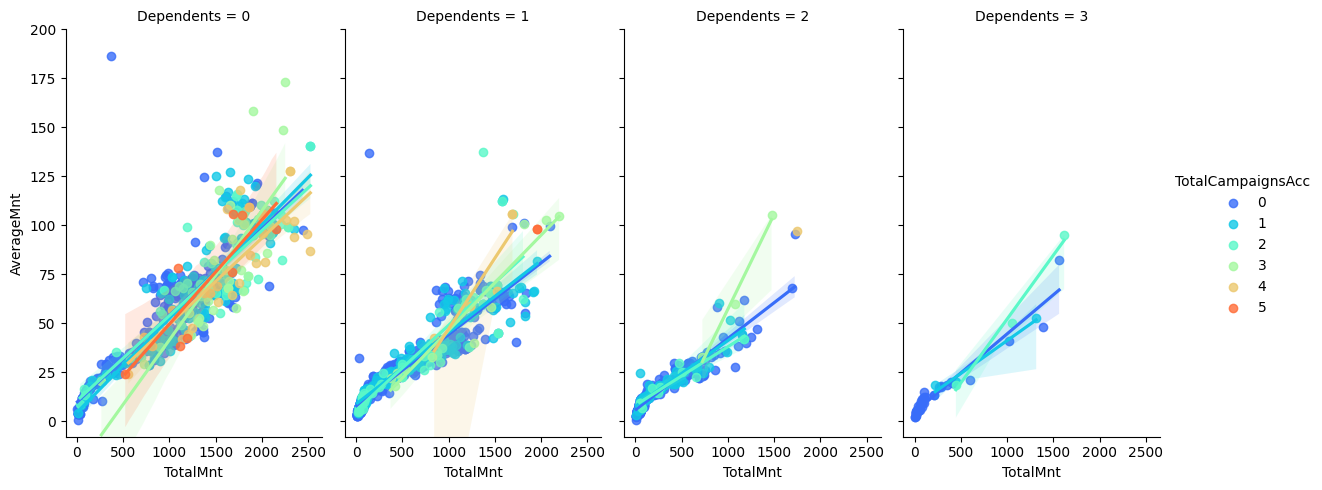

In [282]:
figura3_1_1 = sns.lmplot(x='TotalMnt',y='AverageMnt',data=df3,col='Dependents',hue='TotalCampaignsAcc',palette='rainbow', aspect=0.6)
# Ahora reducimos el tamaño del eje y para que los datos se vean mejor
figura3_1_1.set(ylim=(-8, 200))
figura3_1_1

Parece que el número de dependientes no afecta a la relación positiva gasto total-promedio, pero sí que parece que reduce la cuantía de estos, aunque podría deberse a que hay pocos datos en la muestra.

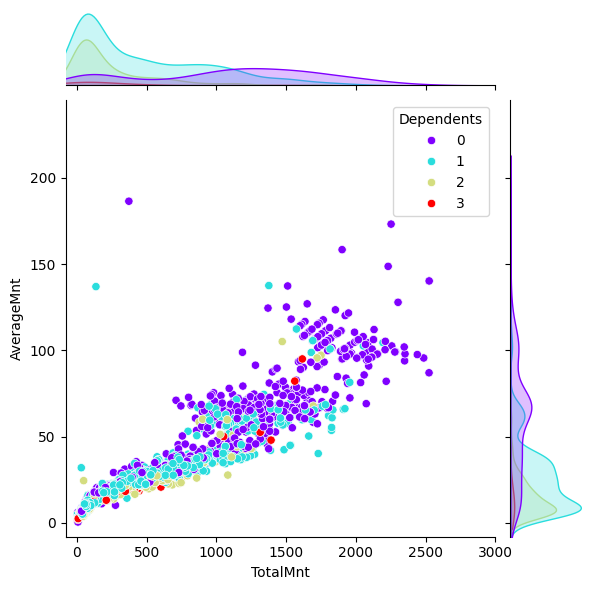

In [275]:
figura3_2 = sns.jointplot(x='TotalMnt',y='AverageMnt',data=df3,kind= "scatter", palette = "rainbow", hue="Dependents")
figura3_2.ax_marg_x.set_xlim(-80, 3000) # Se deja un breve espacio antes el cero para que nos e vean muy apretados los datos
figura3_2.ax_marg_y.set_ylim(-8, 245)
figura3_2

# Los espacios del eje x son de 500, así que busqué un valor negativo que fuese agradable visualmente y que no se viese muy apretado, con -80 me gustó.
# 80/500 = 0.16, por lo que multipliqué el espacio del eje y (50) por 0.16 para obtener 8, y así dejar un espacio proporcionalmente igual (aunque con
# haber dividido entre 10 habría valido en este caso).

Otro apunte interesante en relación con el ejericio de los menores de edad. Se puede percibir, a grandes rasgos, que a mayor número de menores se le atribuyen niveles más reducidos de gasto, tanto total como agregado. 

Si no resulta lo suficientemente claro por la nube de puntos, pueden verse los gráficos superior y derecho, que indican la densidad de concentración de los datos del gasto total y del gasto promedio, respectivamente. Se puede ver que la mayoría de los datos de clientes con 1 o más menores en el hogar se concentran en valores inferiores a 500 dólares, mientras que los clientes sin menores , aunque presentes en todos los tramos, tienen mayor presencia a partir de los 1.000 dólares de gasto. Por otro lado, el análisis es bastante similar con el gasto promedio. La mayoría de clientes con 1 o más menores tienen un gasto promedio inferior a 50 dólares por compra, mientras que los clientes sin dependientes, aunque repartidos, tienen más presencia en regiones de más de 50 dólares en promedio.

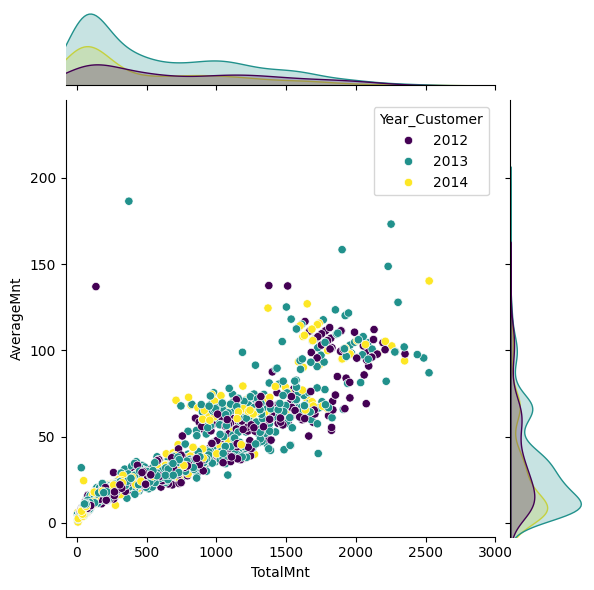

In [277]:
figura3_3 = sns.jointplot(x='TotalMnt',y='AverageMnt',data=df3, kind= "scatter", palette = "viridis", hue="Year_Customer")
figura3_3.ax_marg_x.set_xlim(-80, 3000) 
figura3_3.ax_marg_y.set_ylim(-8, 245)
figura3_3

El análisis con respecto a los años es un poco menos concluyente. A priori parece que el año no es un factor determinante o que categorice el comportamiento del cliente en cuanto a su gasto total y promedio. Para los 3 años, los gastos están distribuidos en torno a valores similares, siendo 2013 el que más clientes contiene, seguido de 2014 y 2012 en último lugar.

## ¿Qué se puede hacer para aumentar el éxito de las campañas?

<Axes: xlabel='Dependents', ylabel='TotalCampaignsAcc'>

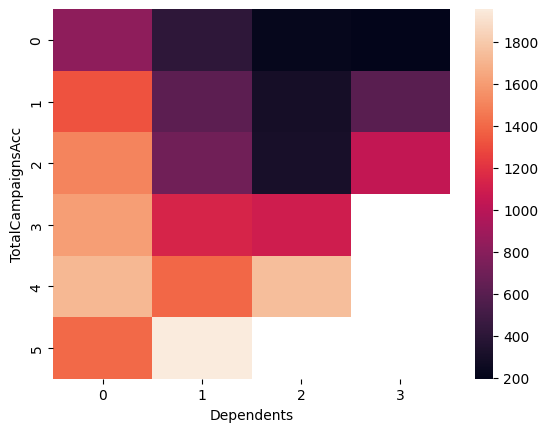

In [124]:
figura4 = df3.pivot_table(values='TotalMnt',index='TotalCampaignsAcc',columns='Dependents')
sns.heatmap(figura4)

Por el mapa de calor de arriba, que refleja la cantidad de clientes (barra de colores) que han aceptado una cierta cantidad de campañas (eje vertical) y su correspondiente número de dependientes, parece que a menor dependientes, más campañas se aceptan, y a más dependientes, menos campañas se aceptan. La mayoría de datos parece que se agrupan en torno a menos de 2 dependientes y 4 campañas o más aceptadas. La minoría de los datos son aquellos con 2 o más dependientes y menos de 2-3 campañas aceptadas, con datos inexistentes en 2 dependientes y 5 campañas, y 3 dependientes y 3 campañas o más de 3.

Parece que a mayor cantidad de dependientes, más probabilidades de que no acepten tantas campañas. Esto puede ayudar a definir nuestro público objetivo, que parecen ser clientes con 1 menor dependiente como máximo o sin ningún dependiente.

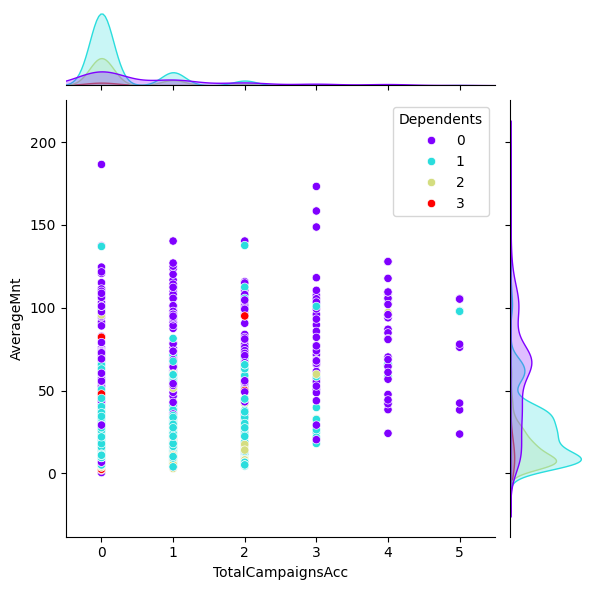

In [278]:
figura4_1 = sns.jointplot(x='TotalCampaignsAcc',y='AverageMnt',data=df3, kind= "scatter", palette= "rainbow", hue="Dependents")
figura4_1.ax_marg_x.set_xlim(-0.5, 5.5) 
figura4_1


Este gráfico es una forma similar al del mapa de calor de visualizar los datos, pero que puede resultar más intuitiva para algunas personas. Se ofrecen las dos para usar la más conveniente. El análisis es el mismo que el anterior. Los puntos violetas y azules (0 y 1 menores) están presentes en todos los niveles de campañas aceptadas, mientras que los verdes y rojos (2 o 3 menores) son, aparte de menos comunes en general, poco comunes o inexistentes en las capas de más campañas aceptadas (3 o más campañas). 

En el histograma superior se ve cómo es la densidad de clientes por campañas, rápidamente descendiente.Finalmente, en el histograma derecho se ve el reparto del gasto promedio según número de dependientes, como se explica en mayor profundidad en la figura 3_2.

## ¿Cómo influye la educación en los resultados?

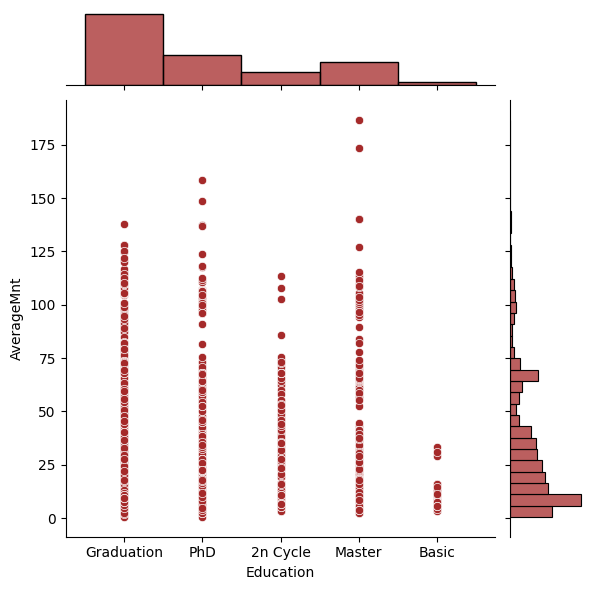

In [210]:
figura5 = sns.jointplot(x='Education',y='AverageMnt',data=df3, kind= "scatter", color= "brown")
figura5

* Por "Graduation" voy a asumir que se refiere a "grado universitario"

La mayoría de clientes tienen un título universitario, y hay más clientes que tienen un doctorado o un máster que aquellos con la educación secundaria o básica completada. A falta de más datos, parece que los promedios más altos se ordenan de la siguiente manera, de menor a mayor: 

1. Aquellos con una educación básica
2. Aquellos con educación secundaria
3. Aquellos titulados universitarios
4. Aquellos con estudios de doctorado
5. Aquellos con un título de máster

Parece que, a mayor nivel de estudios, mayor gasto promedio (asociado probablemente a un mayor nivel de ingresos), aunque todos los grupos consumen en el tramo 0-30, es decir, aquellos con más capacidad adquisitiva no han pasado a consumir más siempre, sino que pueden permitirse más gasto y por eso pueden alcanzar picos de consumo promedio más elevados.

In [221]:
figura5_1 = px.scatter(df3, x="AverageMnt", y="Education", template = "plotly_dark", size = "TotalMnt", color = "Marital_Status", title = "Relación entre el gasto medio y la situación social del cliente", labels = {"Marital_Status": "Estado Civil", "AverageMnt": "Gasto Promedio", "Education": "Nivel de Estudios máximo", "TotalMnt": "Gasto Total"})
figura5_1

In [224]:
figura5_2 = px.scatter(df3, x="TotalMnt", y="Marital_Status", template = "plotly_dark", size = "AverageMnt", color = "Education", title = "Relación entre el gasto total y la situación social del cliente", labels = {"Marital_Status": "Estado Civil", "AverageMnt": "Gasto Promedio", "Education": "Nivel de Estudios máximo", "TotalMnt": "Gasto Total"})
figura5_2

In [240]:
figura5_3 = px.box(df3, x = (df3["Marital_Status"]), y = "AverageMnt", color = "Education", template = "plotly_dark", title = "Relación entre el gasto promedio por estado civil y nivel de estudios", labels = {"Marital_Status": "Estado Civil", "AverageMnt": "Gasto Promedio", "Education": "Nivel de Estudios máximo"})
figura5_3
# Por defecto este gráfico genera boxplots para los 8 estados civiles, pero se han seleccionado los 5 con más datos

A priori, no parece haber grandes diferencias entre individuos con diferentes niveles de estudios en cada estado civil, salvo en los clientes con estudios básicos, que son inferiores.

Si comparamos entre todos los estados sociales, uno a uno cada nivel de estudios, no se observarán diferencias significativas en el nivel de consumo, aunque sí que a mayor nivel de estudios, tiende a haber un mayor nivel de gasto, por ejemplo, si comparamos entre básico y máster o PhD.